In [182]:
import pandas as pd
import numpy as np
import os 
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
#merging processed file into raw merge file for further processing
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "processed").exists())

#creating 2 columns to identify source file and if ios or android
df = pd.read_csv(root / "data" / "processed" / "merged" / "parent_clean.csv", header=0)
df = df[df['eventSensorDetectionMthd'] == 1]
print(df.shape)
df.head()

(7310, 27)


,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,...,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,speed_gap,aggressive
3,0,android_turns.csv,5.0,12.743101,3.173500,0.007654,1.0,15.306123,10.714942,13.421639,...,1.770240,1.770240,10.335592,17.929585,45.601433,57.610783,23.959110,21.440578,2.706697,0
7,0,android_turns.csv,5.0,11.281634,2.737719,0.008573,1.0,19.387754,9.529365,10.491248,...,1.923563,1.923563,8.839477,11.777087,11.200174,32.709633,9.324203,18.774883,0.961883,0
8,0,android_turns.csv,5.0,11.028114,3.967555,0.009012,1.0,16.836735,8.478003,14.696693,...,2.675334,2.675334,15.374709,22.094933,70.401276,88.539480,3.087557,17.636868,6.218689,0
9,0,android_turns.csv,4.0,19.864027,5.356430,0.025984,1.0,20.663265,22.033857,18.588970,...,2.829652,3.461131,16.410183,16.592813,88.200966,89.536600,12.669695,31.072239,-3.444887,0
10,0,android_turns.csv,5.0,16.620464,5.078434,0.019170,1.0,19.387754,19.640330,18.141582,...,2.307141,3.010263,13.193044,18.612541,67.001440,95.261020,10.121602,28.506523,-1.498748,0


In [184]:
df.columns.tolist()

['is_ios',
 'source_file',
 'eventType',
 'eventSampleSpeed',
 'eventDurationSeconds',
 'eventMilesDriven',
 'eventSensorDetectionMthd',
 'eventGPSSignalStrength',
 'eventStartSpeed',
 'eventEndSpeed',
 'memsMedianLateralAccel',
 'memsP75LateralAccel',
 'memsP95LateralAccel',
 'memsMedianHorizontalNorm',
 'memsP75HorizontalNorm',
 'memsP95HorizontalNorm',
 'gpsMedianLateralAccel',
 'gpsP75LateralAccel',
 'gpsP95LateralAccel',
 'bearing_angular_change_per_second',
 'gyro_angular_change_per_second',
 'bearingAngleChange',
 'gyroAngleChange',
 'mems_radius',
 'gps_radius',
 'speed_gap',
 'aggressive']

In [185]:
# columns to keep (with the earlier-dropped ones removed)
keep_cols = [
    'is_ios',
    'source_file',
    "eventType",
    "eventSampleSpeed",
    "eventDurationSeconds",
    "eventMilesDriven",
    "eventSensorDetectionMthd",
    "eventGPSSignalStrength",
    "eventStartSpeed",
    "eventEndSpeed",
    "memsMedianHorizontalNorm",
    "memsP75HorizontalNorm",
    "memsP95HorizontalNorm",
    "gyro_angular_change_per_second",
    "gyroAngleChange",
    "mems_radius"
]

# keep only these columns
df = df[[c for c in keep_cols if c in df.columns]]

print(df.columns.to_list())

['is_ios', 'source_file', 'eventType', 'eventSampleSpeed', 'eventDurationSeconds', 'eventMilesDriven', 'eventSensorDetectionMthd', 'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed', 'memsMedianHorizontalNorm', 'memsP75HorizontalNorm', 'memsP95HorizontalNorm', 'gyro_angular_change_per_second', 'gyroAngleChange', 'mems_radius']


In [186]:
print(f"IOS {df[df['is_ios'] == 1].shape}")
print(f"Android: {df[df['is_ios'] == 0].shape}")
print(f"Total: {df.shape}")

IOS (7068, 16)
Android: (242, 16)
Total: (7310, 16)


In [187]:
df.groupby("source_file")["memsMedianHorizontalNorm"].describe()

,count,mean,std,min,25%,50%,75%,max
source_file,,,,,,,,
android_turns.csv,242.0,1.880268,0.729621,0.220557,1.409384,1.831711,2.272722,4.922246
ios_turns.csv,7068.0,2.066178,0.784852,0.292356,1.522994,2.011980,2.516937,7.784428


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_64131/3200314501.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


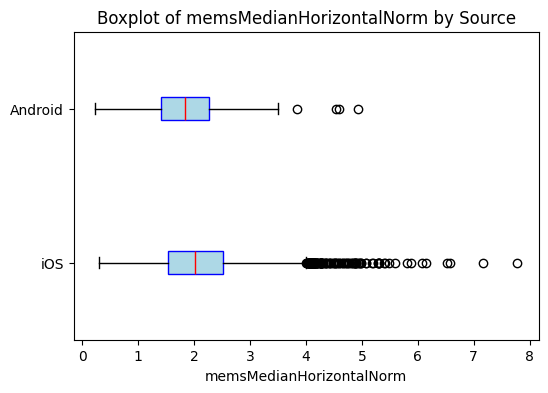

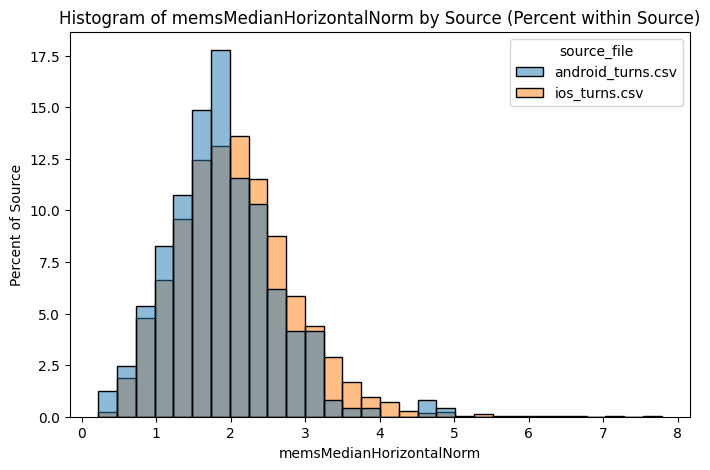

In [188]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['memsMedianHorizontalNorm']
android_data = df[df['is_ios'] == 0]['memsMedianHorizontalNorm']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of memsMedianHorizontalNorm by Source")
plt.xlabel("memsMedianHorizontalNorm")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="memsMedianHorizontalNorm", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of memsMedianHorizontalNorm by Source (Percent within Source)")
plt.xlabel("memsMedianHorizontalNorm")
plt.ylabel("Percent of Source")
plt.show()

In [189]:
df[(df['memsP75HorizontalNorm'] > 15) & (df['source_file'] == 'android_turns.csv')]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_64131/836768223.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


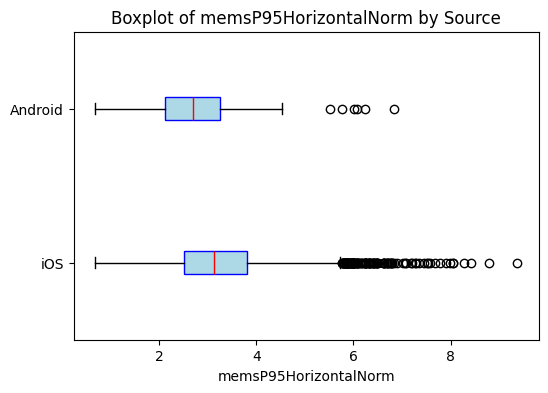

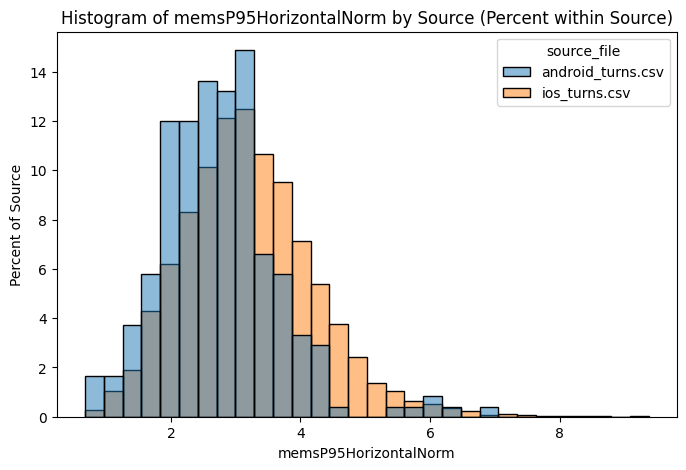

In [190]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['memsP95HorizontalNorm']
android_data = df[df['is_ios'] == 0]['memsP95HorizontalNorm']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of memsP95HorizontalNorm by Source")
plt.xlabel("memsP95HorizontalNorm")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="memsP95HorizontalNorm", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of memsP95HorizontalNorm by Source (Percent within Source)")
plt.xlabel("memsP95HorizontalNorm")
plt.ylabel("Percent of Source")
plt.show()

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_64131/1063449005.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


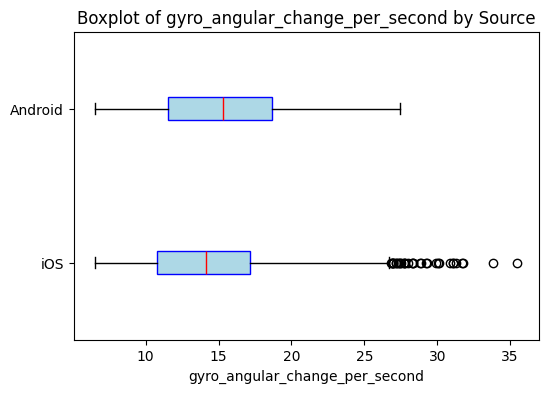

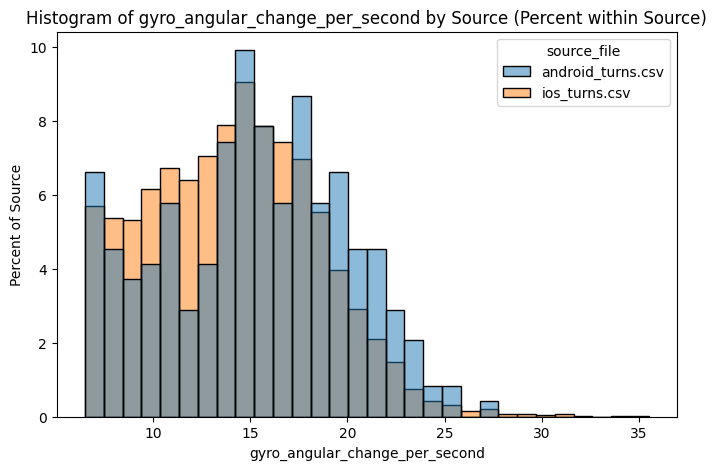

In [191]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['gyro_angular_change_per_second']
android_data = df[df['is_ios'] == 0]['gyro_angular_change_per_second']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gyro_angular_change_per_second by Source")
plt.xlabel("gyro_angular_change_per_second")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="gyro_angular_change_per_second", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of gyro_angular_change_per_second by Source (Percent within Source)")
plt.xlabel("gyro_angular_change_per_second")
plt.ylabel("Percent of Source")
plt.show()

In [192]:
df[df['gyro_angular_change_per_second'] > 100]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_64131/4053563035.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


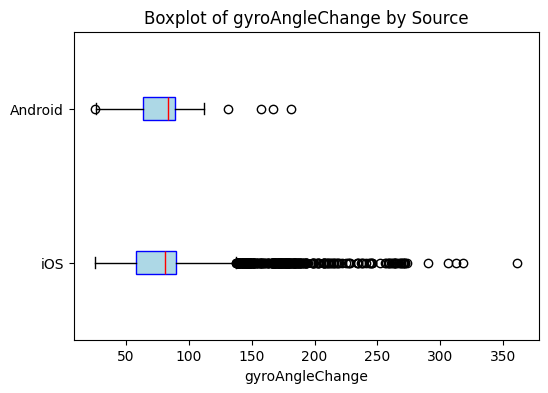

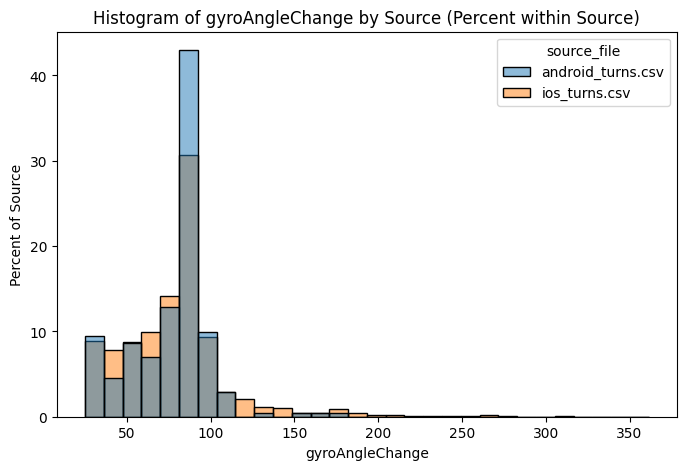

In [193]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['gyroAngleChange']
android_data = df[df['is_ios'] == 0]['gyroAngleChange']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gyroAngleChange by Source")
plt.xlabel("gyroAngleChange")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="gyroAngleChange", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of gyroAngleChange by Source (Percent within Source)")
plt.xlabel("gyroAngleChange")
plt.ylabel("Percent of Source")
plt.show()

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_64131/2416860586.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


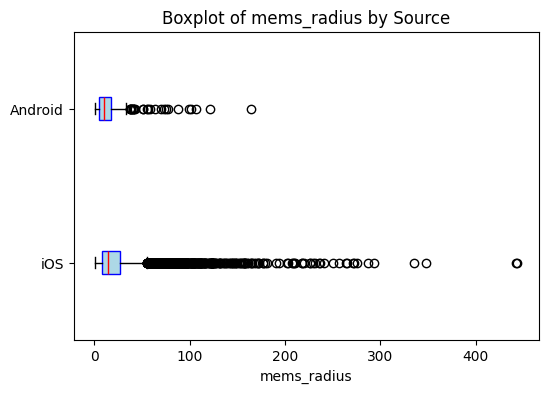

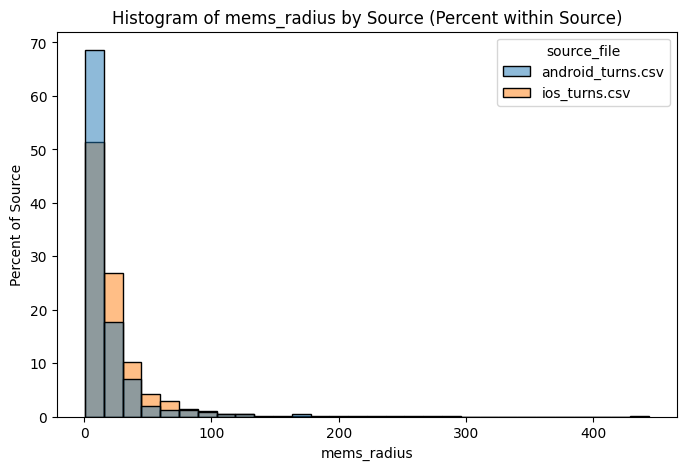

In [194]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['mems_radius']
android_data = df[df['is_ios'] == 0]['mems_radius']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of mems_radius by Source")
plt.xlabel("mems_radius")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="mems_radius", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of mems_radius by Source (Percent within Source)")
plt.xlabel("mems_radius")
plt.ylabel("Percent of Source")
plt.show()

In [195]:
df['mems_radius'].describe()

count    7310.000000
mean       22.953908
std        27.586448
min         0.640292
25%         8.011672
50%        14.806326
75%        26.715545
max       443.719570
Name: mems_radius, dtype: float64

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_64131/1055181402.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


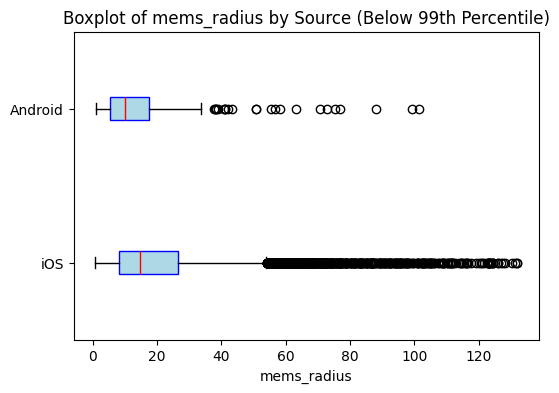

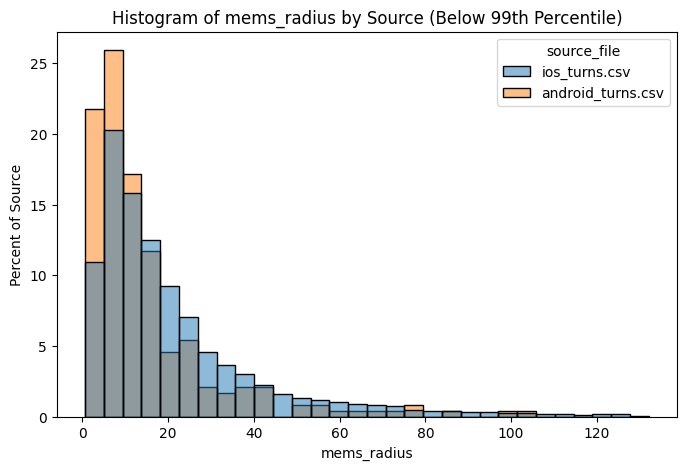

Original size: 7310
New size: 7236
Difference: 74


In [196]:
# Compute 99th percentile threshold
ios_subset = df[df['is_ios'] == 1]
android_subset = df[df['is_ios'] == 0]

Q_ios = ios_subset['mems_radius'].quantile(0.99)
Q_android = android_subset['mems_radius'].quantile(0.99)

filtered_ios = ios_subset[ios_subset['mems_radius'] <= Q_ios].copy()
filtered_android = android_subset[android_subset['mems_radius'] <= Q_android].copy()

# ---------------------- BOX PLOT ----------------------
plt.figure(figsize=(6,4))

ios_radius = filtered_ios['mems_radius']
android_radius = filtered_android['mems_radius']
new_df = pd.concat([filtered_ios, filtered_android], ignore_index=True)

plt.boxplot(
    [ios_radius, android_radius],
    vert=False,
    labels=["iOS", "Android"],
    patch_artist=True,   # enables color fill
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red"),
)

plt.title("Boxplot of mems_radius by Source (Below 99th Percentile)")
plt.xlabel("mems_radius")
plt.show()

# ---------------------- HISTOGRAM ----------------------
plt.figure(figsize=(8,5))
sns.histplot(
    data=new_df, 
    x="mems_radius", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of mems_radius by Source (Below 99th Percentile)")
plt.xlabel("mems_radius")
plt.ylabel("Percent of Source")
plt.show()

print(f"Original size: {df.shape[0]}\nNew size: {new_df.shape[0]}\nDifference: {df.shape[0] - new_df.shape[0]}")


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_64131/1153595906.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


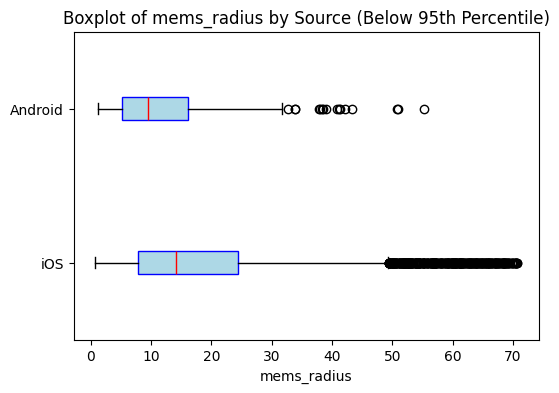

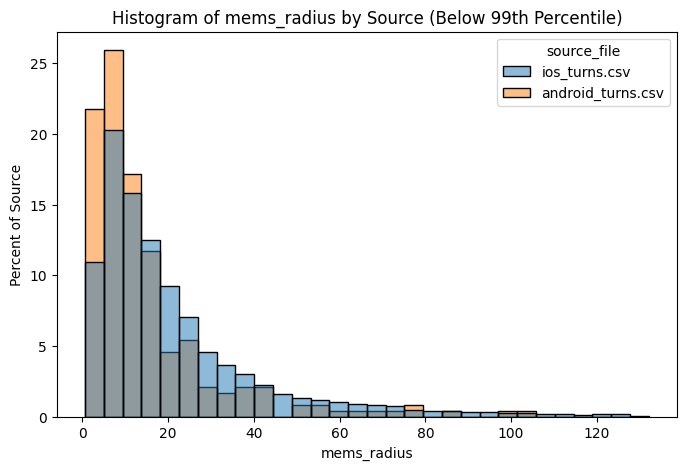

Original size: 7310
New size: 7236
Difference: 74


In [ ]:
# Compute 95th percentile threshold
ios_subset = df[df['is_ios'] == 1]
android_subset = df[df['is_ios'] == 0]

Q_ios = ios_subset['mems_radius'].quantile(0.95)
Q_android = android_subset['mems_radius'].quantile(0.95)

filtered_ios = ios_subset[ios_subset['mems_radius'] <= Q_ios].copy()
filtered_android = android_subset[android_subset['mems_radius'] <= Q_android].copy()

# ---------------------- BOX PLOT ----------------------
plt.figure(figsize=(6,4))

ios_radius = filtered_ios['mems_radius']
android_radius = filtered_android['mems_radius']
new_df_95 = pd.concat([filtered_ios, filtered_android], ignore_index=True)

plt.boxplot(
    [ios_radius, android_radius],
    vert=False,
    labels=["iOS", "Android"],
    patch_artist=True,   # enables color fill
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red"),
)

plt.title("Boxplot of mems_radius by Source (Below 95th Percentile)")
plt.xlabel("mems_radius")
plt.show()

# ---------------------- HISTOGRAM ----------------------
plt.figure(figsize=(8,5))
sns.histplot(
    data=new_df, 
    x="mems_radius", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of mems_radius by Source (Below 95th Percentile)")
plt.xlabel("mems_radius")
plt.ylabel("Percent of Source")
plt.show()

print(f"Original size: {df.shape[0]}\nNew size: {new_df.shape[0]}\nDifference: {df.shape[0] - new_df.shape[0]}")


In [198]:
# Keep 99th percentile threshold
df = new_df

print(df.shape[0])
print(df[df['is_ios'] == 1].shape)
print(df[df['is_ios'] == 0].shape)
df.head()

7236
(6997, 16)
(239, 16)


,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius
0,1,ios_turns.csv,5.0,11.426928,5.000969,0.015633,1.0,4.692786,13.378569,12.348700,2.278688,2.942988,4.573346,19.970547,100.671050,10.603902
1,1,ios_turns.csv,4.0,17.555424,6.761281,0.026182,1.0,4.705270,22.689680,16.379248,2.624327,4.304807,5.564249,12.740743,86.653480,90.622665
2,1,ios_turns.csv,4.0,17.382637,4.160781,0.021301,1.0,4.687359,19.227644,18.887629,3.241758,3.751283,4.594492,21.197142,89.044716,14.150879
3,1,ios_turns.csv,5.0,18.064308,7.178875,0.028847,1.0,9.343048,18.879251,17.766430,0.568076,0.814617,1.199491,13.324430,96.188810,16.615225
4,1,ios_turns.csv,4.0,42.406290,4.291938,0.036166,1.0,10.000000,42.463833,42.348750,1.381544,1.515373,1.671522,6.724542,29.131046,45.779390


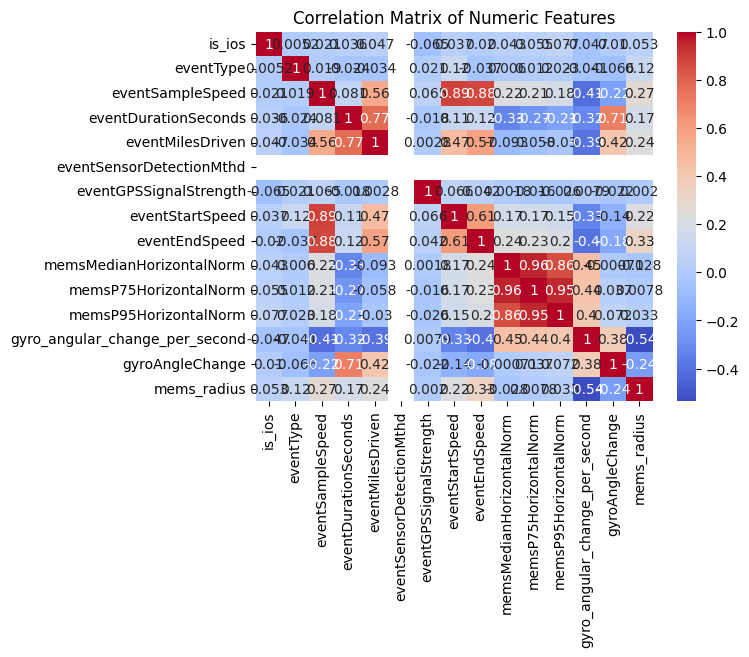

In [199]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlations
corr_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [200]:
df.drop(columns=["memsP75HorizontalNorm", "memsP95HorizontalNorm", "eventSensorDetectionMthd"], inplace=True)
df['eventSpeedChange'] = df['eventEndSpeed'] - df['eventStartSpeed']

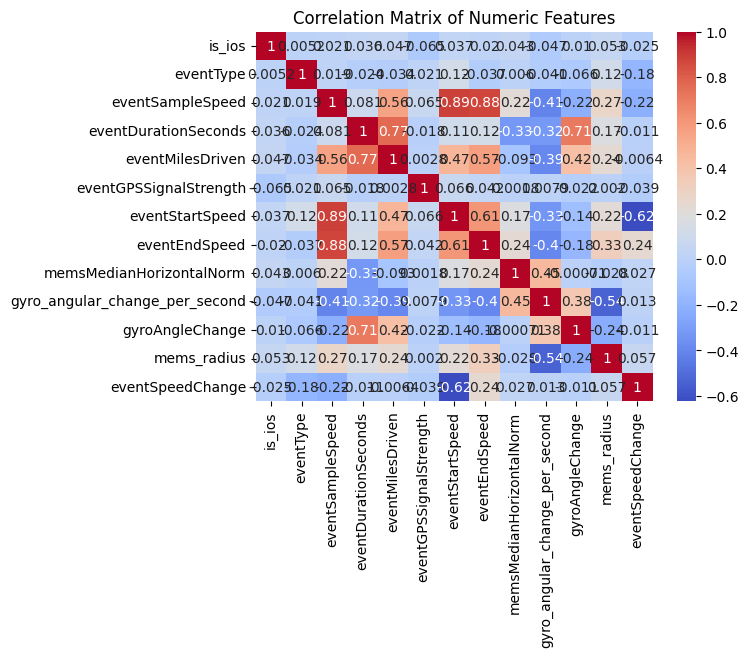

In [201]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlations
corr_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [202]:
df.to_csv(root / "data" / "processed" / "merged"/ "state1_clean.csv", index=False) 
df[df['is_ios'] == 0].to_csv(root / "data" / "processed" / "android"/ "state1_clean.csv", index=False)
df[df['is_ios'] == 1].to_csv(root / "data" / "processed" / "ios"/ "state1_clean.csv", index=False)